### Percentile Maps

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cftime
import pandas as pd

In [2]:
#Load .nc file for CPC
path = '/Users/emmabenedict/Desktop/CURO 4970R/'
cpc_nc = xr.open_dataset(path + 'CPC.1958-1997.US.2x2.5.hourly.precip.nc')
#Load .nc file for IMERG
path = '/Users/emmabenedict/Desktop/CURO 4970R/'
imerg_nc = xr.open_dataset(path + 'IMERG.2001-2020.US.2x2.5.half_hourly.precipitationCal.nc')

In [3]:
#Load variables
#CPC
lat_cpc = cpc_nc.lat
lon_cpc = cpc_nc.lon
time_cpc = cpc_nc.time
precip_cpc = cpc_nc.precip
#MMF
lat_img = imerg_nc.lat
lon_img = imerg_nc.lon
time_img = imerg_nc.time
precip_img = imerg_nc.precipitationCal

In [38]:
#Calculate average rainfall for each gridpoint
avg_precip_cpc = np.mean(precip_cpc, axis = 0)*25.4*24
avg_precip_img = np.mean(precip_img, axis = 0)*24

In [39]:
#Filter out nans
filter_cpc = precip_cpc.dropna(dim='time')
filter_img = precip_img.dropna(dim='time')

In [40]:
#Calculate Percentiles
#99th
cpc_99 = np.percentile(filter_cpc, 99, axis = 0)
img_99 = np.percentile(filter_img, 99, axis = 0)
#75th
cpc_75 = np.percentile(filter_cpc, 75, axis = 0)
img_75 = np.percentile(filter_img, 75, axis = 0)
#50 
cpc_50 = np.percentile(filter_cpc, 50, axis = 0)
img_50 = np.percentile(filter_img, 50, axis = 0)
#25
cpc_25 = np.percentile(filter_cpc, 25, axis = 0)
img_25 = np.percentile(filter_img, 25, axis = 0)

In [34]:
#test = np.percentile(filter_cpc, 50)

NameError: name 'cbar' is not defined

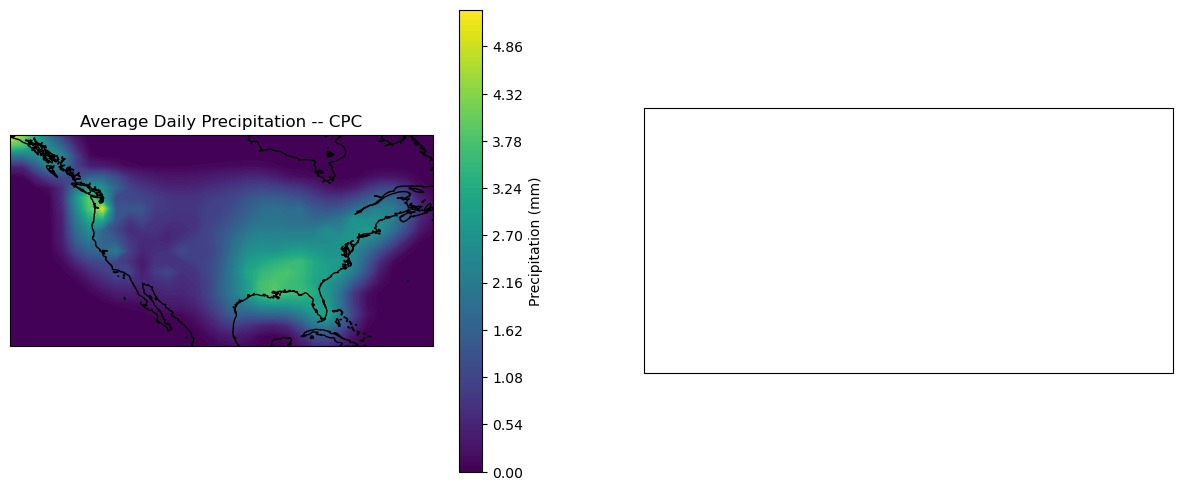

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the average precipitation
c1 = axs[0].contourf(lon_cpc, lat_cpc, avg_precip_cpc, cmap='viridis', levels=100)
axs[0].coastlines()
axs[0].set_title('Average Daily Precipitation -- CPC')
plt.colorbar(c1, ax=axs[0], label='Precipitation (mm)')

# Plot the 99th percentile precipitation
c2 = axs[1].contourf(lon_img, lat_img, avg_precip_img, cmap='viridis', levels=100)
axs[1].coastlines()
axs[1].set_title('Average Daily Precipitation -- IMERG')
plt.colorbar(c2, ax=axs[1], label='Precipitation (mm)')
cbar.set_clim(0, 8)

# Adjust layout
plt.tight_layout()
plt.show()

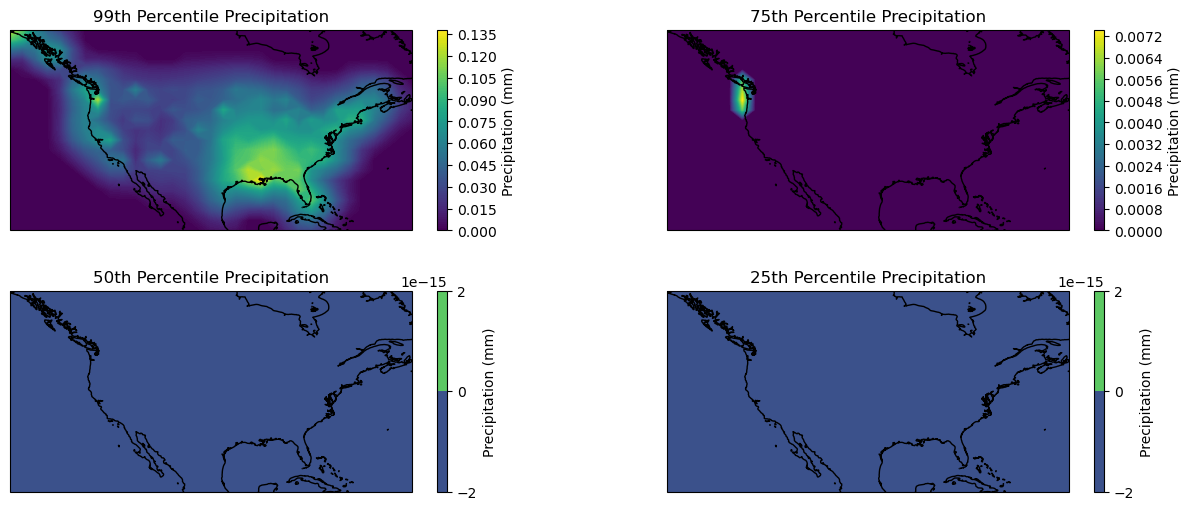

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(15, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the average precipitation
c1 = axs[0,0].contourf(lon_cpc, lat_cpc, cpc_99, cmap='viridis', levels=100)
axs[0,0].coastlines()
axs[0,0].set_title('99th Percentile Precipitation')
plt.colorbar(c1, ax=axs[0,0], label='Precipitation (mm)')

# Plot the 99th percentile precipitation
c2 = axs[0,1].contourf(lon_cpc, lat_cpc, cpc_75, cmap='viridis', levels=100)
axs[0,1].coastlines()
axs[0,1].set_title('75th Percentile Precipitation')
plt.colorbar(c2, ax=axs[0,1], label='Precipitation (mm)')

# Plot the 99th percentile precipitation
c3 = axs[1,0].contourf(lon_cpc, lat_cpc, cpc_50, cmap='viridis', levels=100)
axs[1,0].coastlines()
axs[1,0].set_title('50th Percentile Precipitation')
plt.colorbar(c3, ax=axs[1,0], label='Precipitation (mm)')

# Plot the 99th percentile precipitation
c4 = axs[1,1].contourf(lon_cpc, lat_cpc, cpc_25, cmap='viridis', levels=100)
axs[1,1].coastlines()
axs[1,1].set_title('25th Percentile Precipitation')
plt.colorbar(c4, ax=axs[1,1], label='Precipitation (mm)')

# Adjust layout
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

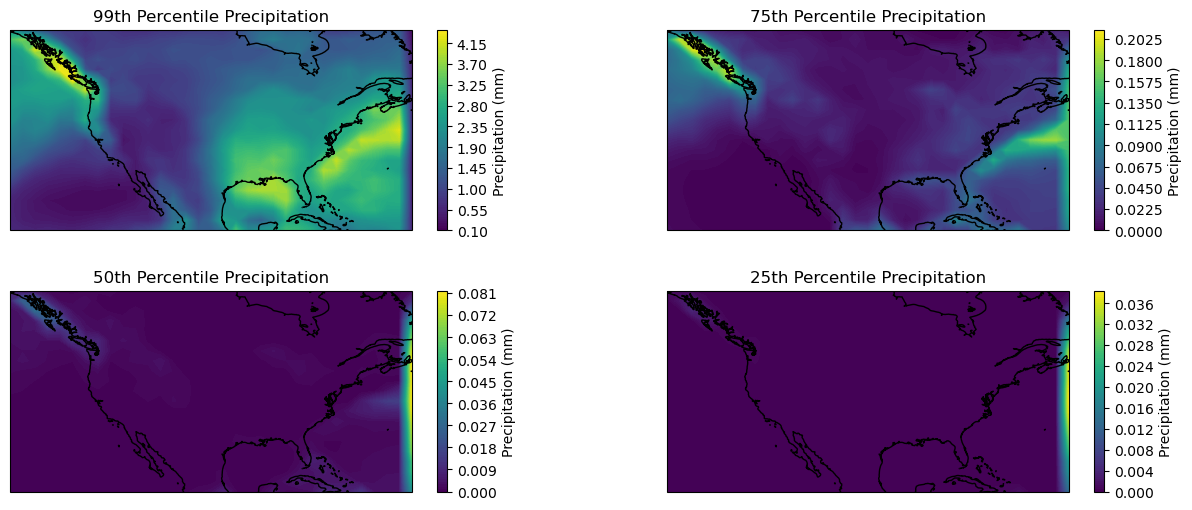

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(15, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the average precipitation
c1 = axs[0,0].contourf(lon_img, lat_img, img_99, cmap='viridis', levels=100)
axs[0,0].coastlines()
axs[0,0].set_title('99th Percentile Precipitation')
plt.colorbar(c1, ax=axs[0,0], label='Precipitation (mm)')

# Plot the 99th percentile precipitation
c2 = axs[0,1].contourf(lon_img, lat_img, img_75, cmap='viridis', levels=100)
axs[0,1].coastlines()
axs[0,1].set_title('75th Percentile Precipitation')
plt.colorbar(c2, ax=axs[0,1], label='Precipitation (mm)')

# Plot the 99th percentile precipitation
c3 = axs[1,0].contourf(lon_img, lat_img, img_50, cmap='viridis', levels=100)
axs[1,0].coastlines()
axs[1,0].set_title('50th Percentile Precipitation')
plt.colorbar(c3, ax=axs[1,0], label='Precipitation (mm)')

# Plot the 99th percentile precipitation
c4 = axs[1,1].contourf(lon_img, lat_img, img_25, cmap='viridis', levels=100)
axs[1,1].coastlines()
axs[1,1].set_title('25th Percentile Precipitation')
plt.colorbar(c4, ax=axs[1,1], label='Precipitation (mm)')

# Adjust layout
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()